<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/Calculating52wkHighlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install yfinance

In [5]:
import pandas as pd
import numpy as np
import yfinance as yf

In [6]:
ticker = pd.read_csv('/content/ind_nifty100list.csv')

In [7]:
ticker.tail(2)

,Company Name,Industry,Symbol,Series,ISIN Code
98,Wipro Ltd.,IT,WIPRO,EQ,INE075A01022
99,Yes Bank Ltd.,FINANCIAL SERVICES,YESBANK,EQ,INE528G01035


In [8]:
START = "2013-01-01"  #yyyy-mm-dd
#END = '2019-06-01'

In [9]:
#Download Data From Yahoo Finance
lst=[]
for i in range(len(ticker)):
  dfi = yf.download(str(ticker.Symbol.iloc[i])+'.ns', start=START)
   
  dfi['result']=dfi['High'].rolling(window=256, min_periods=1).max()
  dfi['result_low']=dfi['Low'].rolling(window=256, min_periods=1).min()
  dfi['high52']=np.where(dfi['High']>=dfi['result'],1,0)
  dfi['low52']=np.where(dfi['Low']<=dfi['result_low'],1,0)
  dfi = dfi.dropna()
   
  #df.head(3)
  #print('Done : '+ nifty10[i])
  #print(df.head(2))
  lst.append(dfi)

#df1.head(3)
print('\n All Completed \n')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [10]:
nlst=[]
for i in range(len(ticker)):
  nlst.append(lst[i].high52)
  nlst.append(lst[i].low52)


In [11]:
df = pd.DataFrame(nlst).T
namelist =[]
for i in range(1,len(ticker)+1):
  namelist.append('high_'+str(i))
  namelist.append('low_'+str(i))
df.columns = namelist

In [12]:
df=df[1:].fillna(0)

In [13]:
features = df.columns.tolist()

In [14]:
feats_set1=[feats for feats in features if feats.startswith('high')]

In [15]:
feats_set2=[feats for feats in features if feats.startswith('low')]

In [16]:
df_high=df[feats_set1]

In [17]:
df_low=df[feats_set2]

In [18]:
df['newhigh']=df_high.sum(axis=1)

In [19]:
df['newlow']=df_low.sum(axis=1)
                        

In [20]:
df_new=df[['newhigh','newlow']]

In [21]:
df_new.tail(2)

,newhigh,newlow
Date,,
2022-02-22,1.0,7.0
2022-02-23,1.0,0.0


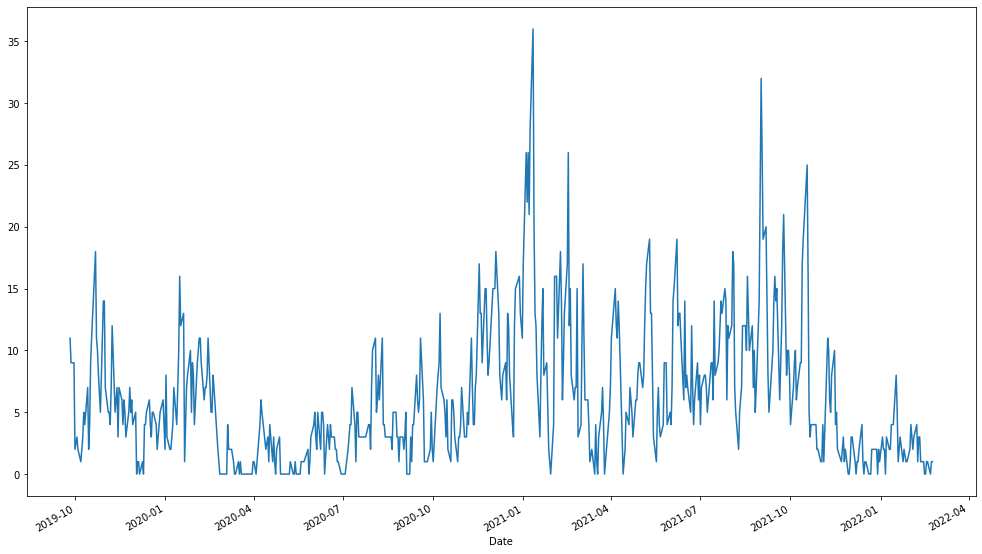

In [22]:
df_new.newhigh[-600:].plot(figsize=(17,10));

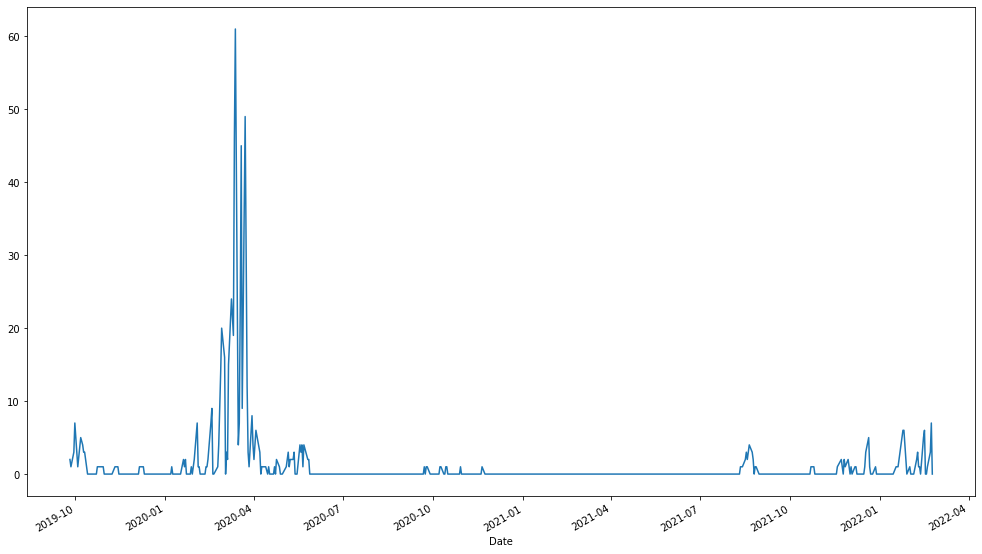

In [23]:
df_new.newlow[-600:].plot(figsize=(17,10));

In [24]:
nifty = yf.download('^nsei',start=START)
nifty=nifty[-1000:].copy()

[*********************100%***********************]  1 of 1 completed


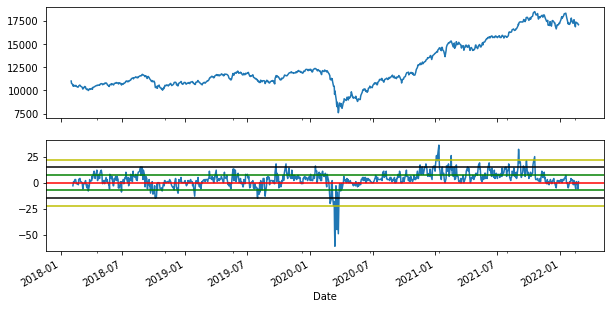

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize=(10,10),sharex=True)
ax[0].plot(nifty['Adj Close'])
ax[1]=(df_new.newhigh[-1000:]-df_new.newlow[-1000:]).plot(figsize=(10,5))
std_dev=(df_new.newhigh[-1000:]-df_new.newlow[-1000:]).std()
ax[1].axhline(y=0,color='r')
ax[1].axhline(y=0+std_dev,color='g')
ax[1].axhline(y=0+std_dev*2,color='k')
ax[1].axhline(y=0-std_dev,color='g')
ax[1].axhline(y=0-std_dev*2,color='k')
ax[1].axhline(y=0-std_dev*3,color='y')
ax[1].axhline(y=0+std_dev*3,color='y');